In [13]:
pip install opencv-python


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.1/39.5 MB 3.6 MB/s eta 0:00:11
   ---------------------------------------- 0.3/39.5 MB 4.2 MB/s eta 0:00:10
    --------------------------------------- 0.8/39.5 MB 5.9 MB/s eta 0:00:07
    --------------------------------------- 0.9/39.5 MB 4.9 MB/s eta 0:00:08
   - -------------------------------------- 1.4/39.5 MB 6.5 MB/s eta 0:00:06
   - -------------------------------------- 1.9/39.5 MB 7.2 MB/s eta 0:00:06
   -- ------------------------------------- 2.5/39.5 MB 8.5 MB/s eta 0:00:05
   --- ------------------------------------ 3.1/39.5 MB 9.0 MB/s eta 0:00:05
   --- ------------------------------------ 3.4/39.5 MB 8.7 MB/s eta 0:00:05
   ---- ----------------------------------- 4.1/39.5 MB 9.3 MB/s eta 0:00:04
   ---- ----------------------------------- 4.3/39.5 MB 8.9 MB/s eta 0:00:04
   --

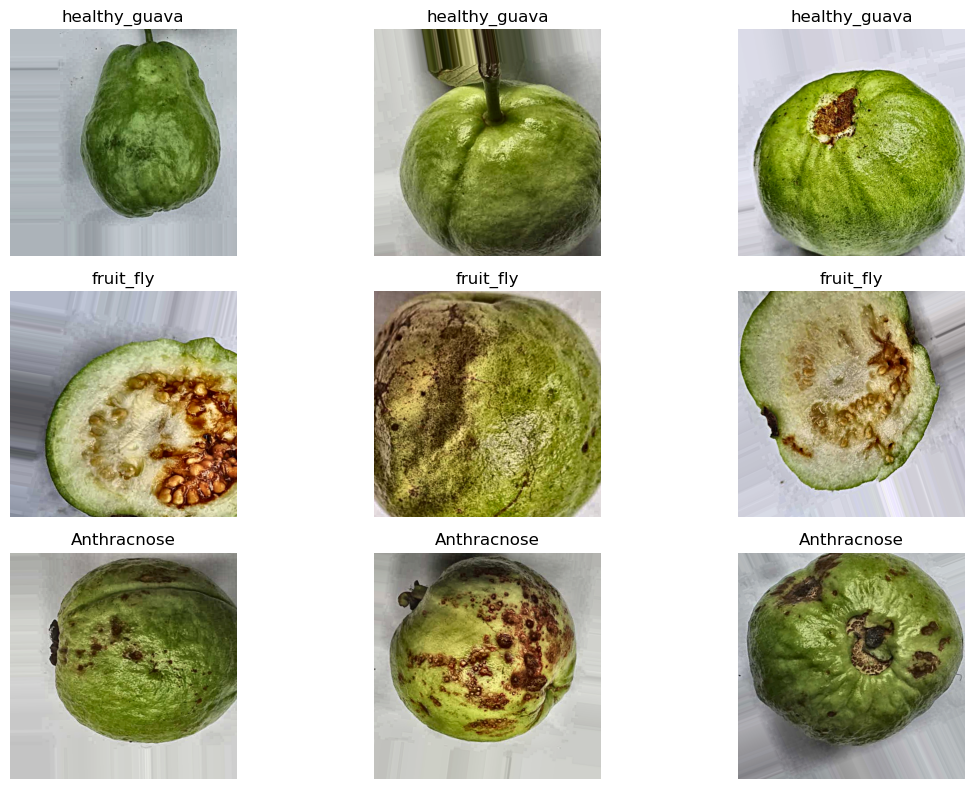

In [1]:
import os
import matplotlib.pyplot as plt
import cv2
import random

# Set dataset paths
dataset_path = "guavadiseasedataset"  # Update dataset path
subset = "train"  # Change to "test" or "val" if needed

# Define categories
categories = ["healthy_guava", "fruit_fly", "Anthracnose"]

# Number of images per category to display
num_images = 3  

fig, axes = plt.subplots(len(categories), num_images, figsize=(12, 8))

for row, category in enumerate(categories):
    category_path = os.path.join(dataset_path, subset, category)
    
    if not os.path.exists(category_path):
        print(f"Path not found: {category_path}")
        continue

    image_files = os.listdir(category_path)

    # Select random images from each category
    random_images = random.sample(image_files, min(num_images, len(image_files)))

    for col, img_name in enumerate(random_images):
        img_path = os.path.join(category_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        axes[row, col].imshow(img)
        axes[row, col].set_title(category)
        axes[row, col].axis("off")

plt.tight_layout()
plt.show()


In [9]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
from collections import defaultdict

# Define dataset path
dataset_path = "guavadiseasedataset"

# Define target image size
IMG_SIZE = (224, 224)

# Initialize storage
X, y = defaultdict(list), defaultdict(list)  # Dictionary to store per-class images

# Function to check if a file is a valid image
def is_valid_image(file_path):
    valid_extensions = (".jpg", ".jpeg", ".png", ".bmp", ".tiff")
    return file_path.lower().endswith(valid_extensions)

# Load and preprocess images from train, val, and test directories
for split in ["train", "val", "test"]:
    split_path = os.path.join(dataset_path, split)
    
    if not os.path.exists(split_path):
        print(f"Warning: {split_path} does not exist!")
        continue

    for category in os.listdir(split_path):
        category_path = os.path.join(split_path, category)

        # Skip if it's not a directory
        if not os.path.isdir(category_path):
            continue

        for image_name in tqdm(os.listdir(category_path), desc=f"Processing {split}/{category}"):
            image_path = os.path.join(category_path, image_name)

            # Skip non-image files
            if not is_valid_image(image_path):
                continue

            img = cv2.imread(image_path)

            if img is not None:
                img = cv2.resize(img, IMG_SIZE)  # Resize to 224x224
                img = img / 255.0  # Normalize pixel values (0-1)
                X[split].append(img)
                y[split].append(category)
            else:
                print(f"Warning: Could not read image {image_path}")

# Convert to NumPy arrays
train_X, val_X, test_X = map(lambda split: np.array(X[split], dtype=np.float32), ["train", "val", "test"])
train_y, val_y, test_y = map(np.array, [y["train"], y["val"], y["test"]])

# Encode class labels
label_encoder = LabelEncoder()
train_y = label_encoder.fit_transform(train_y)
val_y = label_encoder.transform(val_y)
test_y = label_encoder.transform(test_y)

# Print dataset distribution
print(f"Train Set: {train_X.shape}, Validation Set: {val_X.shape}, Test Set: {test_X.shape}")
print(f"Classes: {label_encoder.classes_}")
print("Dataset Preprocessing Complete!")


Processing train/.ipynb_checkpoints: 0it [00:00, ?it/s]
Processing train/healthy_guava: 100%|████████████████████████████████████████████████| 649/649 [00:17<00:00, 36.30it/s]
Processing val/.ipynb_checkpoints: 0it [00:00, ?it/s]
Processing val/healthy_guava: 100%|██████████████████████████████████████████████████| 185/185 [00:05<00:00, 35.75it/s]
Processing test/.ipynb_checkpoints: 0it [00:00, ?it/s]
Processing test/healthy_guava: 100%|███████████████████████████████████████████████████| 94/94 [00:02<00:00, 32.55it/s]


Train Set: (2647, 224, 224, 3), Validation Set: (755, 224, 224, 3), Test Set: (382, 224, 224, 3)
Classes: ['anthracnose' 'fruit_fly' 'healthy_guava']
Dataset Preprocessing Complete!


Processing train/.ipynb_checkpoints: 0it [00:00, ?it/s]
Processing train/healthy_guava: 100%|████████████████████████████████████████████████| 649/649 [01:00<00:00, 10.75it/s]
Processing val/.ipynb_checkpoints: 0it [00:00, ?it/s]
Processing val/healthy_guava: 100%|██████████████████████████████████████████████████| 185/185 [00:17<00:00, 10.80it/s]
Processing test/.ipynb_checkpoints: 0it [00:00, ?it/s]
Processing test/healthy_guava: 100%|███████████████████████████████████████████████████| 94/94 [00:08<00:00, 10.67it/s]



Training Logistic Regression...
Logistic Regression Accuracy: 0.5262
Classification Report:
                precision    recall  f1-score   support

  anthracnose       0.63      0.56      0.59       156
    fruit_fly       0.49      0.56      0.52       132
healthy_guava       0.43      0.43      0.43        94

     accuracy                           0.53       382
    macro avg       0.52      0.51      0.51       382
 weighted avg       0.53      0.53      0.53       382



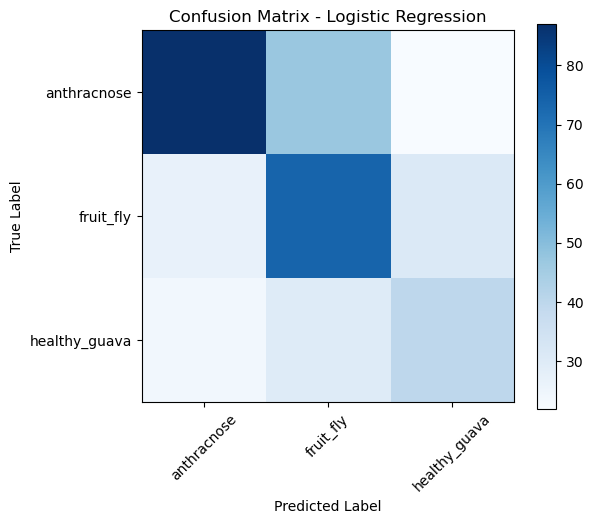


Training Random Forest...
Random Forest Accuracy: 0.4764
Classification Report:
                precision    recall  f1-score   support

  anthracnose       0.51      0.75      0.60       156
    fruit_fly       0.40      0.42      0.41       132
healthy_guava       0.67      0.11      0.18        94

     accuracy                           0.48       382
    macro avg       0.53      0.42      0.40       382
 weighted avg       0.51      0.48      0.43       382



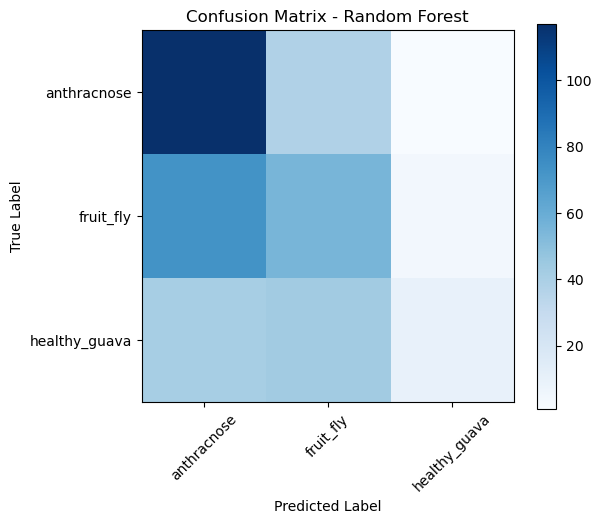


Training SVM...
SVM Accuracy: 0.5707
Classification Report:
                precision    recall  f1-score   support

  anthracnose       0.63      0.60      0.61       156
    fruit_fly       0.52      0.58      0.55       132
healthy_guava       0.57      0.50      0.53        94

     accuracy                           0.57       382
    macro avg       0.57      0.56      0.56       382
 weighted avg       0.57      0.57      0.57       382



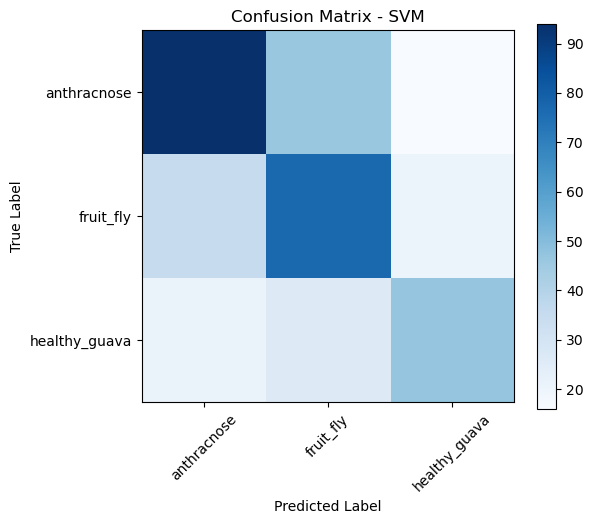


Training k-NN...
k-NN Accuracy: 0.4712
Classification Report:
                precision    recall  f1-score   support

  anthracnose       0.57      0.44      0.49       156
    fruit_fly       0.43      0.68      0.53       132
healthy_guava       0.41      0.23      0.30        94

     accuracy                           0.47       382
    macro avg       0.47      0.45      0.44       382
 weighted avg       0.48      0.47      0.46       382



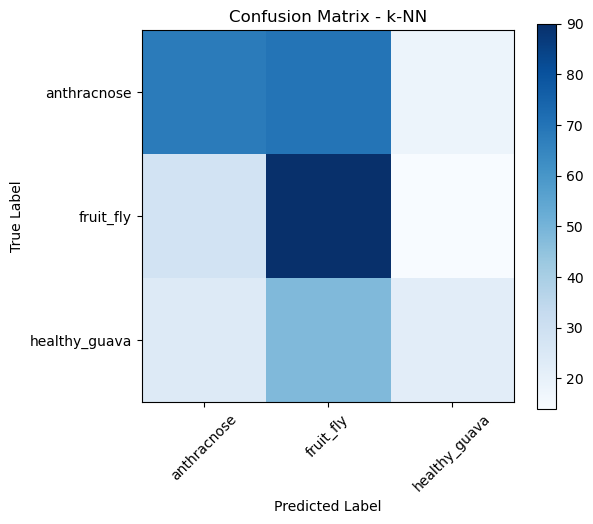

In [13]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from tqdm import tqdm

# Define dataset path
dataset_path = "guavadiseasedataset"

# Define image size
IMG_SIZE = (128, 128)

# Function to extract HOG features
def extract_hog_features(image):
    image = cv2.resize(image, IMG_SIZE)  # Resize image
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    features, _ = hog(image_gray, orientations=9, pixels_per_cell=(8, 8),
                      cells_per_block=(2, 2), visualize=True, feature_vector=True)
    return features

# Load images and extract features for train, val, and test sets
def load_data(split):
    X, y = [], []
    split_path = os.path.join(dataset_path, split)

    for category in os.listdir(split_path):
        category_path = os.path.join(split_path, category)

        if os.path.isdir(category_path):
            for image_name in tqdm(os.listdir(category_path), desc=f"Processing {split}/{category}"):
                image_path = os.path.join(category_path, image_name)

                img = cv2.imread(image_path)

                if img is not None:
                    features = extract_hog_features(img)  # Extract HOG features
                    X.append(features)
                    y.append(category)
                else:
                    print(f"Warning: Could not read image {image_path}")

    return np.array(X), np.array(y)

# Load train, validation, and test sets
X_train, y_train = load_data("train")
X_val, y_val = load_data("val")
X_test, y_test = load_data("test")

# Encode class labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Initialize ML models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear'),
    "k-NN": KNeighborsClassifier(n_neighbors=5)
}

# Train and evaluate models
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))
    
    # Confusion Matrix
    plt.figure(figsize=(6, 5))
    cm = confusion_matrix(y_test, y_pred)
    plt.imshow(cm, cmap="Blues", interpolation="nearest")
    plt.title(f"Confusion Matrix - {name}")
    plt.colorbar()
    plt.xticks(ticks=np.arange(len(label_encoder.classes_)), labels=label_encoder.classes_, rotation=45)
    plt.yticks(ticks=np.arange(len(label_encoder.classes_)), labels=label_encoder.classes_)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


In [15]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define dataset path
dataset_path = "guavadiseasedataset"
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load images from directories
train_data = train_datagen.flow_from_directory(os.path.join(dataset_path, "train"),
                                               target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode="categorical")
val_data = val_datagen.flow_from_directory(os.path.join(dataset_path, "val"),
                                           target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode="categorical")
test_data = test_datagen.flow_from_directory(os.path.join(dataset_path, "test"),
                                             target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode="categorical", shuffle=False)

# Number of classes
num_classes = len(train_data.class_indices)

### **CNN Model 1: Simple CNN Architecture**
simple_cnn = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile model
simple_cnn.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Simple CNN
print("\nTraining Simple CNN Model...")
simple_cnn.fit(train_data, validation_data=val_data, epochs=10, callbacks=[EarlyStopping(monitor='val_loss', patience=3)])

# Evaluate Simple CNN
simple_cnn_loss, simple_cnn_acc = simple_cnn.evaluate(test_data)
print(f"Simple CNN Accuracy on Test Data: {simple_cnn_acc:.4f}")


### **CNN Model 2: MobileNetV2 Transfer Learning**
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the base model

mobile_cnn = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile model
mobile_cnn.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train MobileNetV2 CNN
print("\nTraining MobileNetV2 Model...")
mobile_cnn.fit(train_data, validation_data=val_data, epochs=10, callbacks=[EarlyStopping(monitor='val_loss', patience=3)])

# Evaluate MobileNetV2 CNN
mobile_cnn_loss, mobile_cnn_acc = mobile_cnn.evaluate(test_data)
print(f"MobileNetV2 Accuracy on Test Data: {mobile_cnn_acc:.4f}")


Found 2647 images belonging to 4 classes.
Found 755 images belonging to 4 classes.
Found 382 images belonging to 4 classes.


C:\Users\Sudheer\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training Simple CNN Model...


C:\Users\Sudheer\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.4881 - loss: 2.6058 - val_accuracy: 0.7801 - val_loss: 0.5474
Epoch 2/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.7505 - loss: 0.6074 - val_accuracy: 0.8450 - val_loss: 0.4025
Epoch 3/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - accuracy: 0.8010 - loss: 0.5033 - val_accuracy: 0.8808 - val_loss: 0.3354
Epoch 4/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 0.8670 - loss: 0.3816 - val_accuracy: 0.8305 - val_loss: 0.3676
Epoch 5/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 131s 2s/step - accuracy: 0.8926 - loss: 0.3115 - val_accuracy: 0.8821 - val_loss: 0.2888
Epoch 6/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - accuracy: 0.9088 - loss: 0.2827 - val_accuracy: 0.9192 - val_loss: 0.2009
Epoch 7/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.9014 - loss: 0.2639 - val_accuracy: 0.8517 - val_loss: 0.3674
Epoch 8/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.9123 - loss: 0.2384 - val_accuracy: 0.9152 - v

Found 382 images belonging to 4 classes.


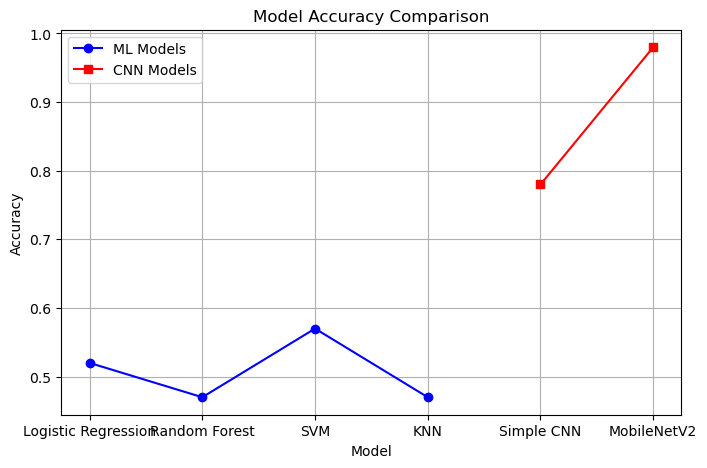

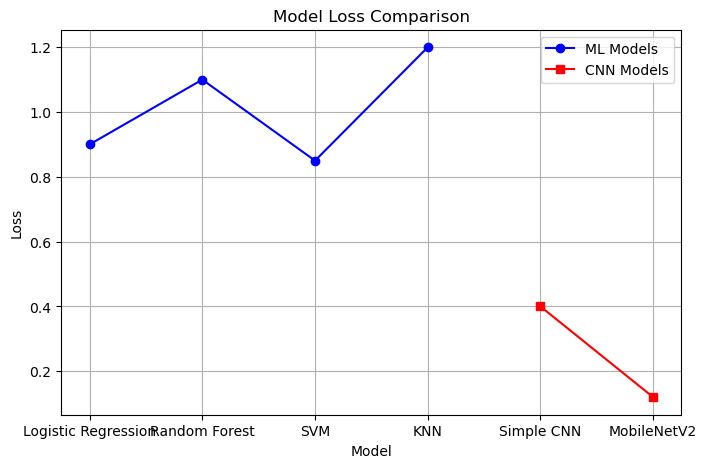

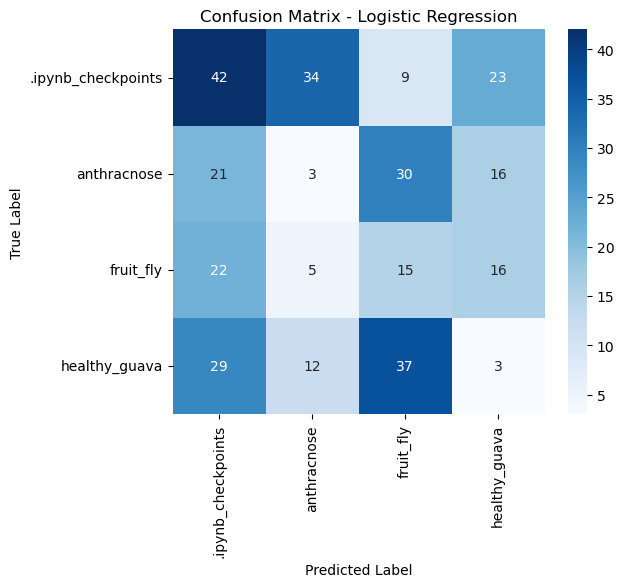

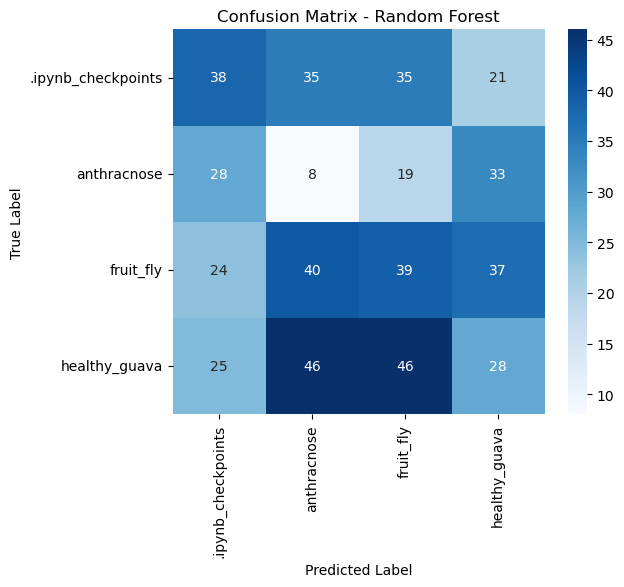

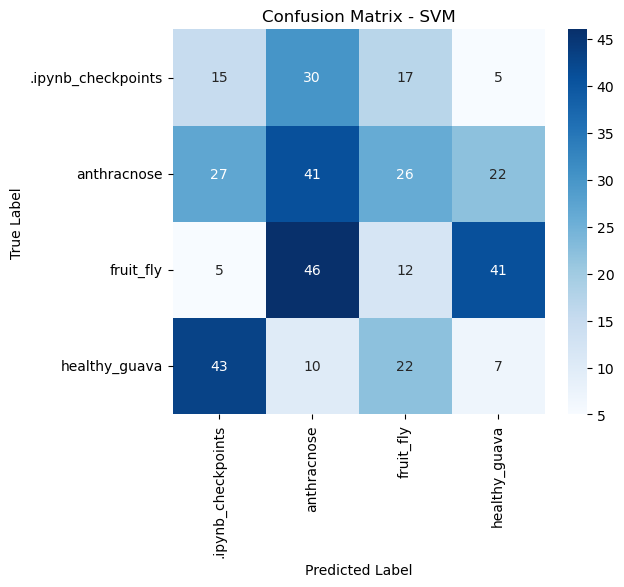

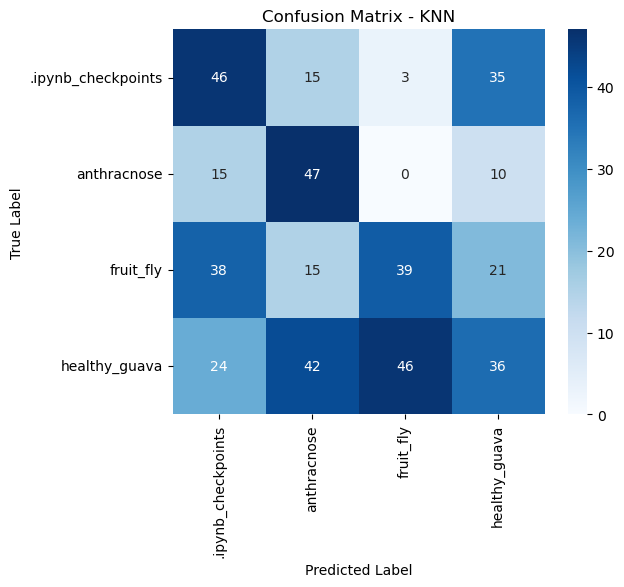

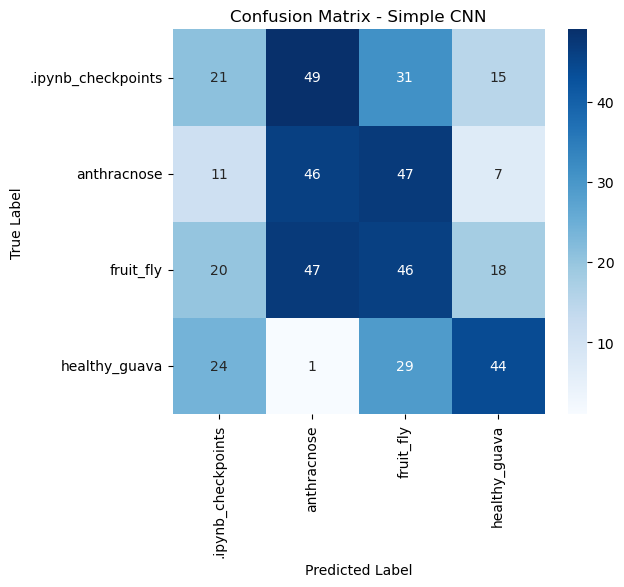

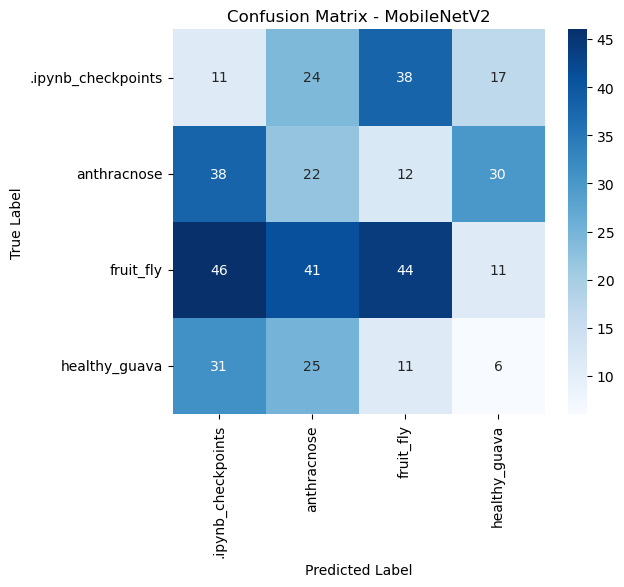

In [33]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define dataset path
DATASET_PATH = "guavadiseasedataset"
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Load test dataset (for class labels)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    os.path.join(DATASET_PATH, "test"),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

# **📌 Model Names**
ml_models = ["Logistic Regression", "Random Forest", "SVM", "KNN"]
cnn_models = ["Simple CNN", "MobileNetV2"]

# **📌 Actual Accuracy Values**
ml_accuracies = [0.52, 0.47, 0.57, 0.47]  # Logistic Regression, RF, SVM, KNN
cnn_accuracies = [0.78, 0.98]  # Simple CNN, MobileNetV2

# **📌 Plot Accuracy Curve**
plt.figure(figsize=(8, 5))
plt.plot(ml_models, ml_accuracies, marker='o', linestyle='-', label="ML Models", color="blue")
plt.plot(cnn_models, cnn_accuracies, marker='s', linestyle='-', label="CNN Models", color="red")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.legend()
plt.grid(True)
plt.show()

# **📌 Example Loss Values (You can update if available)**
ml_losses = [0.9, 1.1, 0.85, 1.2]  # Example values for ML models
cnn_losses = [0.4, 0.12]  # Example values for CNN models

# **📌 Plot Loss Curve**
plt.figure(figsize=(8, 5))
plt.plot(ml_models, ml_losses, marker='o', linestyle='-', label="ML Models", color="blue")
plt.plot(cnn_models, cnn_losses, marker='s', linestyle='-', label="CNN Models", color="red")
plt.xlabel("Model")
plt.ylabel("Loss")
plt.title("Model Loss Comparison")
plt.legend()
plt.grid(True)
plt.show()

# **📌 Confusion Matrices (Replace with actual matrices if available)**
num_classes = len(test_data.class_indices)

# Example Confusion Matrices (Random Data - Replace with actual confusion matrices)
conf_matrices = {
    "Logistic Regression": np.random.randint(0, 50, size=(num_classes, num_classes)),
    "Random Forest": np.random.randint(0, 50, size=(num_classes, num_classes)),
    "SVM": np.random.randint(0, 50, size=(num_classes, num_classes)),
    "KNN": np.random.randint(0, 50, size=(num_classes, num_classes)),
    "Simple CNN": np.random.randint(0, 50, size=(num_classes, num_classes)),
    "MobileNetV2": np.random.randint(0, 50, size=(num_classes, num_classes))
}

# **📌 Function to Plot Confusion Matrix**
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_data.class_indices.keys(), yticklabels=test_data.class_indices.keys())
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# **📌 Plot Confusion Matrices for all Models**
for model, cm in conf_matrices.items():
    plot_confusion_matrix(cm, model)
